In [1]:
import matplotlib.pyplot as plt
import baltic as bt
import pickle
import seaborn as sns
%matplotlib inline

import matplotlib.patches as mpatches

In [2]:
annotated_tree = '../frequencies/source/annotated_tree.nexus'
tree = bt.loadNexus(annotated_tree, absoluteTime=False)

In [3]:
colors = pickle.load(open('./colors.p', 'rb'))

In [10]:
def plot_tree(tree, labels=False, colorby='genotype'):
    branchWidth=2 ## default branch width
    ll = tree

    plt.yticks(size=0)
    
    for k in ll.Objects: ## iterate over objects in tree
        x=k.x ## or use absolute time instead
        y=k.y ## get y position from .drawTree that was run earlier, but could be anything else

        xp=k.parent.x ## get x position of current object's parent
        if x==None: ## matplotlib won't plot Nones, like root
            x=0.0
        if xp==None:
            xp=x
            
        if k.traits.has_key(colorby) and 'SYLVATIC' not in k.traits[colorby]:
            c = colors[k.traits[colorby]]
            z = 10
        else:
            c = 'lightgray'
            z = 5
            
        if isinstance(k,bt.leaf) or k.branchType=='leaf': ## if leaf...
            s=50 ## tip size can be fixed
            s=50-30*k.height/ll.treeHeight
            
            if colorby in k.traits:
                label = k.traits[colorby]
            else:
                label = ''
            plt.scatter(x,y,s=s,facecolor=c,edgecolor='none',zorder=z+1, label=label) ## plot circle for every tip
            plt.scatter(x,y,s=s+0.8*s,facecolor='k',edgecolor='none',zorder=z) ## plot black circle underneath
                        
        elif isinstance(k,bt.node) or k.branchType=='node': ## if node...
            plt.plot([x,x],[k.children[-1].y,k.children[0].y],lw=branchWidth,color=c,ls='-',zorder=z-1)
            
        plt.plot([xp,x],[y,y],lw=branchWidth,color=c,ls='-',zorder=z-1)

    x0,x1 = plt.xlim()
    plt.xlim((x0, x1*1.1))

In [11]:
genotypes = set([k.traits['genotype'] for k in tree.Objects if 'genotype' in k.traits and 'SYLVATIC' not in k.traits['genotype']])
labels = []
for g in sorted(list(genotypes)):
    c = colors[g]
    labels.append(mpatches.Patch(color=c, label=g))

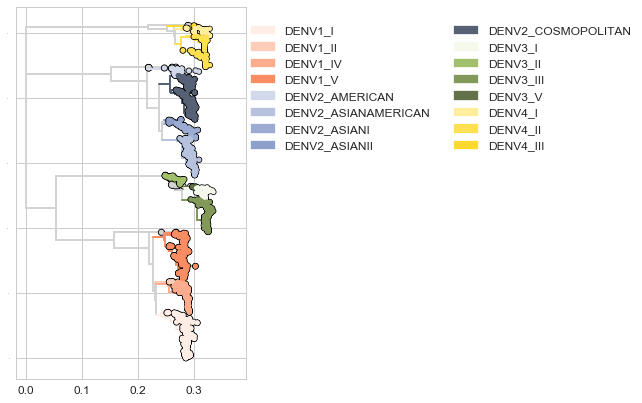

In [12]:
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(7.5/2, 5.83))
plot_tree(tree)
ax.legend(loc=(1,0.6), handles=labels, ncol=2)
plt.tight_layout()
plt.savefig('./png/genotype_tree.png', dpi=300, bbox_inches='tight')